### Clustering

- Clustering is an unsupervised machine learning technique used to group similar data points together based on features or patterns, without using labeled data. It’s useful in tasks like customer segmentation, anomaly detection, image compression, and more.


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In the next code cell we are going to generate some dataset that we are going to use for clastering.

In [36]:
SEED = 23
X, _ = make_moons(n_samples=300, noise=0.05, random_state=SEED)

### 1. K-Means Clustering
- Assigns k centroids, assigns data points to the nearest centroid, and updates centroids until convergence.
- Best for: Spherical, equally sized clusters.
- Fast, easy to implement.
- Requires specifying k; struggles with non-spherical clusters or outliers.

In [39]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X)

C:\Users\crisp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### 2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- Groups together points that are closely packed; marks points in low-density regions as outliers.
- Detects arbitrary-shaped clusters; handles noise well.
- Struggles with varying densities; sensitive to parameter selection.

In [42]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

### 3. Hierarchical Clustering

a) Agglomerative (bottom-up)
b) Divisive (top-down)

- Builds a tree (dendrogram) of clusters by merging or splitting.
- No need to pre-specify the number of clusters.
- Computationally expensive for large datasets.

In [45]:
hierarchical = AgglomerativeClustering(n_clusters=2)
hier_labels = hierarchical.fit_predict(X)

Then let's visualize the results that we got from these clustering labels.

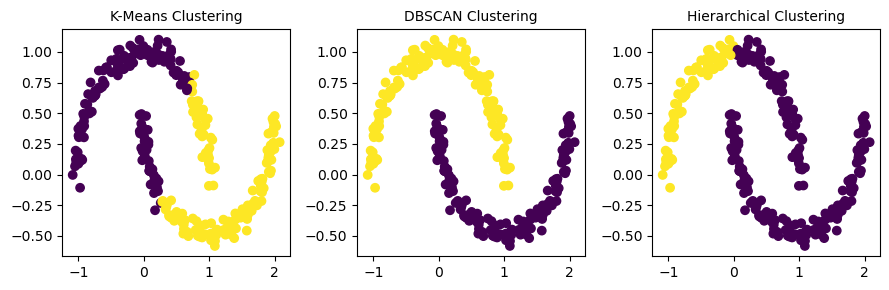

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
axs[0].set_title('K-Means Clustering', fontsize=10)
axs[1].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
axs[1].set_title('DBSCAN Clustering', fontsize=10)
axs[2].scatter(X[:, 0], X[:, 1], c=hier_labels, cmap='viridis')
axs[2].set_title('Hierarchical Clustering', fontsize=10)
plt.tight_layout()
plt.show()

### 4. Gaussian Mixture Models (GMM)
- Assumes data is generated from a mixture of several Gaussian distributions.
- Soft clustering (probabilistic assignments); more flexible than K-Means.
- Can be sensitive to initialization; assumes Gaussian distribution.

> Use GMM when clusters are Gaussian-shaped and you want soft clustering (i.e. probabilities).

In [51]:
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=SEED)
gmm_labels = gmm.fit_predict(X)

C:\Users\crisp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### 5. Spectral Clustering
- Uses eigenvalues of a similarity matrix to reduce dimensionality before clustering.
- Effective for complex, non-convex clusters.
- Computationally expensive for large datasets.

> Use Spectral Clustering when clusters are arbitrary-shaped, non-convex, or not linearly separable.

In [54]:
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', 
                              assign_labels='kmeans', random_state=SEED)
spectral_labels = spectral.fit_predict(X)

C:\Users\crisp\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\crisp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


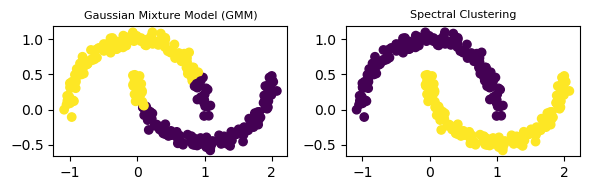

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(6, 2))
axs[0].scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis')
axs[0].set_title('Gaussian Mixture Model (GMM)', fontsize=8)
axs[1].scatter(X[:, 0], X[:, 1], c=spectral_labels, cmap='viridis')
axs[1].set_title('Spectral Clustering', fontsize=8)

plt.tight_layout()
plt.show()

###  Evaluating algorithims Using Silhouette Score
Silhouette Score tells you how well each point lies within its cluster. It ranges from -1 to 1, where higher is better.


In [70]:
gmm_score = silhouette_score(X, gmm_labels)
spectral_score = silhouette_score(X, spectral_labels)
kmeans_score = silhouette_score(X, kmeans_labels)
hier_score = silhouette_score(X, hier_labels)
dbscan_score = silhouette_score(X, dbscan_labels)

print(f"GMM Silhouette Score: {gmm_score:.3f}")
print(f"Spectral Clustering Silhouette Score: {spectral_score:.3f}")

GMM Silhouette Score: 0.461
Spectral Clustering Silhouette Score: 0.325


In [72]:
def safe_silhouette(X, labels):
    unique_labels = np.unique(labels)
    if len(unique_labels) < 2 or len(unique_labels) == len(X):
        return -1
    return silhouette_score(X, labels)


In [74]:
scores = {
    'K-Means': safe_silhouette(X, kmeans_labels),
    'Hierarchical': safe_silhouette(X, hier_labels),
    'DBSCAN': safe_silhouette(X, dbscan_labels),
    'GMM': safe_silhouette(X, gmm_labels),
    'Spectral': safe_silhouette(X, spectral_labels),
}

K-Means Silhouette Score: 0.491
Hierarchical Silhouette Score: 0.429
DBSCAN Silhouette Score: 0.325
GMM Silhouette Score: 0.461
Spectral Silhouette Score: 0.325


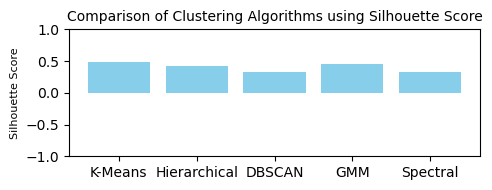

In [76]:
# Print scores
for name, score in scores.items():
    print(f"{name} Silhouette Score: {score:.3f}")

# Plot bar graph
plt.figure(figsize=(5, 2))
plt.bar(scores.keys(), scores.values(), color='skyblue')
plt.ylabel("Silhouette Score", fontsize=8)
plt.title("Comparison of Clustering Algorithms using Silhouette Score", fontsize=10)
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()